In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd 
import numpy  as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk


%matplotlib inline

In [2]:
df = pd.read_csv("emnist-letters-train.csv")

In [3]:
df.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.iloc[:,0]=df.iloc[:,0]-1

In [5]:
df.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.iloc[:,0].min(),df.iloc[:,0].max()

(0, 25)

In [7]:
x = df.iloc[:,1:].values
y=df.iloc[:,0].values
x.shape,y.shape

((88799, 784), (88799,))

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y,shuffle=True)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((71039, 784), (17760, 784), (71039,), (17760,))

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=26, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │          13,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 677,914 (2.59 MB)

 Trainable params: 677,914 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss=SparseCategoricalCrossentropy()
              ,optimizer=Adam(learning_rate=1e-3)
              , metrics=["accuracy"]
)

In [14]:
x_train=np.array(x_train)

In [15]:
OCRTraining = model.fit(
    x_train, y_train,
    epochs=100,batch_size=32
)

Epoch 1/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6824 - loss: 1.0656
Epoch 2/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8610 - loss: 0.4325
Epoch 3/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8835 - loss: 0.3530
Epoch 4/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8952 - loss: 0.3070
Epoch 5/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9041 - loss: 0.2795
Epoch 6/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9082 - loss: 0.2616
Epoch 7/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9135 - loss: 0.2459
Epoch 8/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9181 - loss: 0.2278
Epoch 9/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9218 - loss: 0.2248
Epoch 10/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9266 - loss: 0.2098
Epoch 11/100
2220/2220 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9259 - loss: 0.2139
Epoch 1

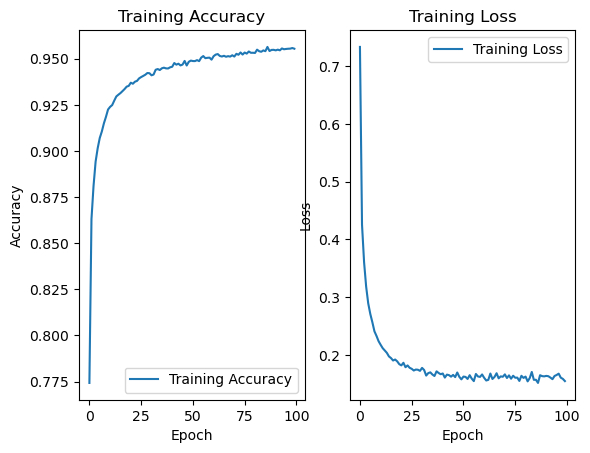

In [16]:
plt.subplot(1, 2, 1)
plt.plot(OCRTraining.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(OCRTraining.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
OCRPredicition = model.predict(x_test) #prediction_model

555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [18]:
prediction = tf.nn.softmax(OCRPredicition)
LabelsOfPredictions = np.argmax(prediction, axis=1)

In [19]:
loss,Accuracy=model.evaluate(x_test,y_test)

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9090 - loss: 0.7838


In [20]:
Accuracy

0.9092905521392822

In [21]:
def letter(pred):
         letters={i: chr(ord('a') + i) for i in range(26)}
    
         return letters[pred]

C:\Users\USER\AppData\Local\Temp\ipykernel_11072\1881057207.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_11072\1881057207.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


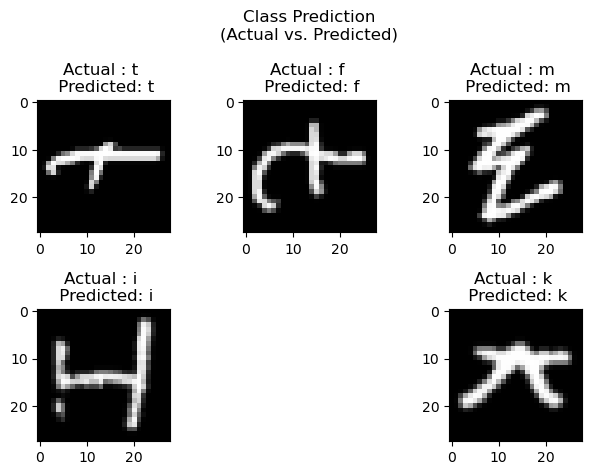

In [22]:
plt.suptitle("Class Prediction\n(Actual vs. Predicted)")
for i in range(6):
    image = x_test[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.title(f"Actual : {letter(y_test[i])} \n Predicted: {letter(LabelsOfPredictions[i])}")
    plt.imshow(image,cmap="gray")
    plt.tight_layout()

In [23]:
conf_matrix = confusion_matrix(y_test,LabelsOfPredictions)
accuracy = accuracy_score(y_test, LabelsOfPredictions)
precision = precision_score(y_test, LabelsOfPredictions, average='weighted')  
recall = recall_score(y_test, LabelsOfPredictions, average='weighted')  
f1 = f1_score(y_test, LabelsOfPredictions, average='weighted')  

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 90.93%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


<Axes: >

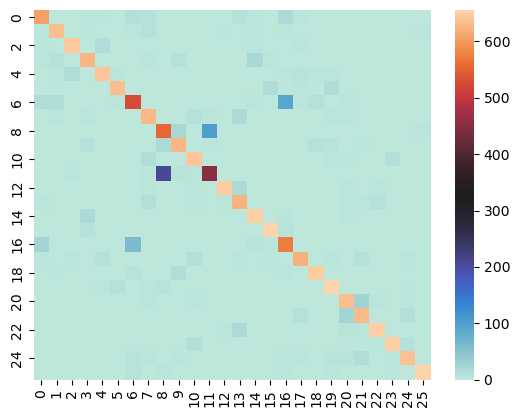

In [24]:
sns.heatmap(conf_matrix,cmap='icefire')

In [25]:
model.save("OCRUsingANN.h5")

In [26]:
import cv2
import numpy as np

In [35]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk


prediction_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',
    5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
    15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

def browse_file():
    # global filename_string
    filename = filedialog.askopenfilename(
        filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif")]
    )
    if filename:
        # filename_string.set(filename)  # Set the filename to the string variable
        display_image(filename)

def display_image(filename):
    image = Image.open(filename)
    image.thumbnail((500, 500))  # Resize image to fit in the window
    photo = ImageTk.PhotoImage(image)

    # Display the image in a label
    label.config(image=photo)
    label.image = photo  # Keep a reference to the image to prevent garbage collection
    
     # Read the image using OpenCV with the selected filename
    image_cv2 = cv2.imread(filename)
    image_cv2 = cv2.resize(image_cv2, (28, 28))  # Resize the image
    image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
    flipped_image = cv2.flip(image_gray, 1)
    image_rotated = cv2.rotate(flipped_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    npImage = np.array(image_rotated).flatten()
    npImage = npImage.reshape(1, -1)  # Reshape to (1, 784) assuming it's a single image

    # Perform prediction
    OCRPredicition=model.predict(npImage)

    prediction=tf.nn.softmax(OCRPredicition)
    LabelsOfPredictions = np.argmax(prediction, axis=1)
    print(LabelsOfPredictions)

    def letter(pred):
         letters={i: chr(ord('a') + i) for i in range(26)}
    
         return letters[pred]
    

    def letter(prediction):
        letters={i: chr(ord('A') + i) for i in range(26)}
        return letters[prediction]
    
    

    text_entry.delete(0, tk.END)  # Clear existing text
    # text_entry.insert(0, str(predictions))  # Insert prediction result
    text_entry.insert(0, letter(LabelsOfPredictions[0]))  # Insert prediction result
    
    message_entry_accuracy.config(text="Accuracy: {:.2f}%".format(accuracy * 100))  # Update text of Message widget
    message_entry_precision.config(text="Precision: {:.2f}%".format(precision * 100))  # Update text of Message widget

    
    # root.update_idletasks()

# Create the main application window
root = tk.Tk()
root.title("Handwritten OCR using ANN")
root.geometry("800x600")  # Set initial window size

# Create a button to browse for a photo
browse_button = tk.Button(root, text="Browse Photo", command=browse_file)
browse_button.pack(pady=10)

# Create a label to display the photo
label = tk.Label(root)
label.pack()

# Add an empty text field below the image
# filename_string = tk.StringVar() # String variable to hold the filename
text_entry = tk.Entry(root)
text_entry.pack(pady=10)

message_entry_accuracy = tk.Message(root, width=300)
message_entry_accuracy.pack(pady=10)

message_entry_precision = tk.Message(root, width=300)
message_entry_precision.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[0]
